# Importing necessary libraries 

In [156]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [157]:
from sklearn.model_selection import train_test_split # it helps to split model in desied prercentage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import math

# Reading csv file

In [158]:
#import pandas as pd
data = pd.read_csv('AutoData (1).csv')
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [159]:
data.describe() #having look of data 

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [160]:
data.isnull().sum() #checking null values

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [161]:
data.info() #checking data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [162]:
data.corr() #correlation between all the numerical variables

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


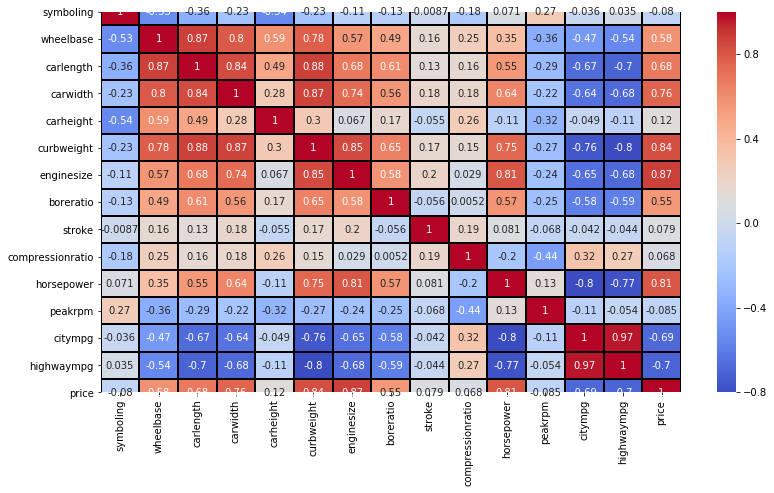

In [163]:
#import matplotlib.pyplot as plt
#import seaborn as sns
plt.subplots(figsize = (13,7))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm', linewidths = 1, linecolor = 'black') 
#heatmap chart for correlation

In [164]:
data[['boreratio','stroke','compressionratio','horsepower','citympg','enginesize','curbweight']].corr()
#checking correlation between engine features

,boreratio,stroke,compressionratio,horsepower,citympg,enginesize,curbweight
boreratio,1.000000,-0.055909,0.005197,0.573677,-0.584532,0.583774,0.648480
stroke,-0.055909,1.000000,0.186110,0.080940,-0.042145,0.203129,0.168790
compressionratio,0.005197,0.186110,1.000000,-0.204326,0.324701,0.028971,0.151362
horsepower,0.573677,0.080940,-0.204326,1.000000,-0.801456,0.809769,0.750739
citympg,-0.584532,-0.042145,0.324701,-0.801456,1.000000,-0.653658,-0.757414
enginesize,0.583774,0.203129,0.028971,0.809769,-0.653658,1.000000,0.850594
curbweight,0.648480,0.168790,0.151362,0.750739,-0.757414,0.850594,1.000000


# Building Regplot for all the features which have high correlation with target variable (Price)

In [165]:
data[['enginesize','price']].corr()

,enginesize,price
enginesize,1.000000,0.874145
price,0.874145,1.000000


(0, 56609.13066225671)

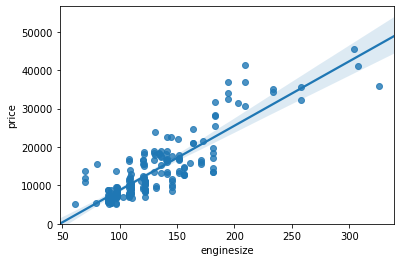

In [166]:
# Engine size as potential predictor variable of price
sns.regplot(x="enginesize", y="price", data=data)
plt.ylim(0,)

In [167]:
data[['curbweight','price']].corr()

,curbweight,price
curbweight,1.000000,0.835305
price,0.835305,1.000000


(0, 47863.134536007114)

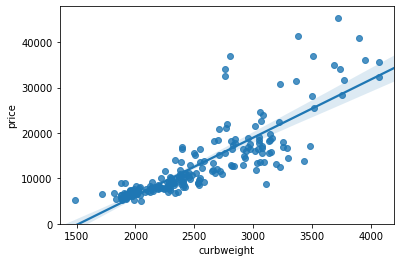

In [168]:
# Curbweight as potential predictor variable of price
sns.regplot(x="curbweight", y="price", data=data)
plt.ylim(0,)

In [169]:
data[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


(0, 54149.55728398472)

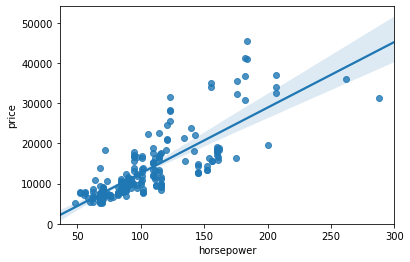

In [170]:
# Horse Power as potential predictor variable of price
sns.regplot(x="horsepower", y="price", data=data)
plt.ylim(0,)

# Checking relationship between catagorical values and Target (Price)

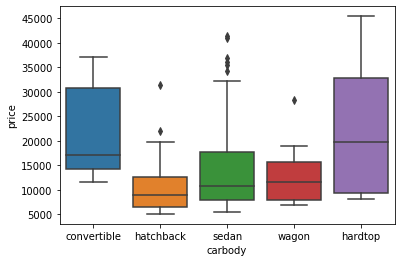

In [171]:
# Let's look at the relationship between "car body" and "price"

sns.boxplot(x="carbody", y="price", data=data)

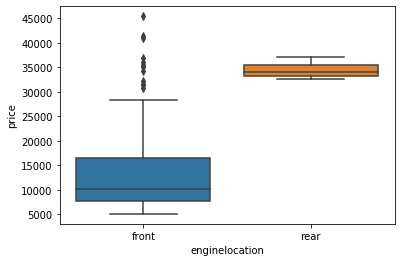

In [172]:
# Let's look at the relationship between "engine location" and "price"

sns.boxplot(x="enginelocation", y="price", data=data)

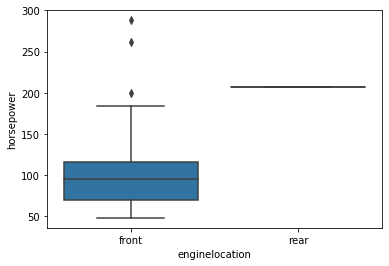

In [173]:
# Let's look at the relationship between "engine location" and "horsepower"

sns.boxplot(x="enginelocation", y="horsepower", data=data)

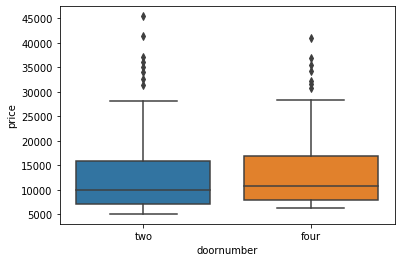

In [174]:
# Let's look at the relationship between "door number" and "price"

sns.boxplot(x="doornumber", y="price", data=data)

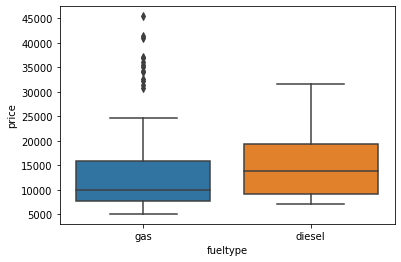

In [175]:
# Let's look at the relationship between "fuel type" and "price"

sns.boxplot(x="fueltype", y="price", data=data)

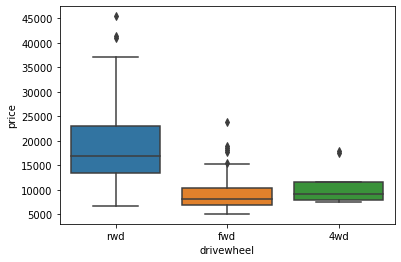

In [176]:
# Let's look at the relationship between "drive wheel" and "price"

sns.boxplot(x="drivewheel", y="price", data=data)

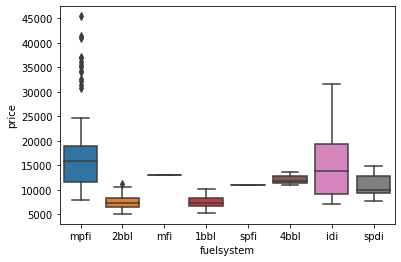

In [177]:
# Let's look at the relationship between "fuel system" and "price"

sns.boxplot(x="fuelsystem", y="price", data=data)

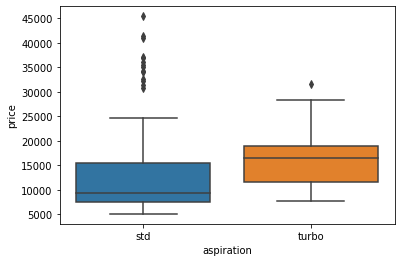

In [178]:
# Let's look at the relationship between "aspiration" and "price"

sns.boxplot(x="aspiration", y="price", data=data)

In [179]:
#Sperating brands and model in make column
data[['brand','model']] = data.make.str.split(" ",1,expand=True) 

In [180]:
#data['brand'].describe()
data['brand'].unique() #looking for all the brands

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [181]:
#Replacing miss-spelled values with the right ones in brand column
data['brand'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}, inplace=True)

In [182]:
#data['brand'].describe()
data['brand'].unique() #re-checking the values in brand column

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

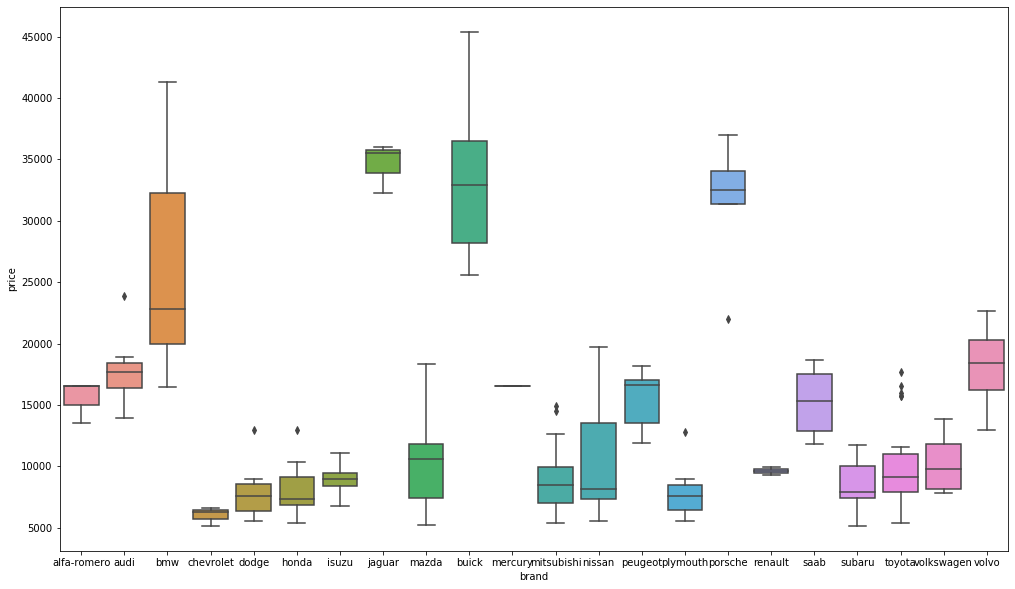

In [183]:
# Let's look at the relationship between "brand" and "price"

plt.subplots(figsize = (17,10))
sns.boxplot(x="brand", y="price", data=data)

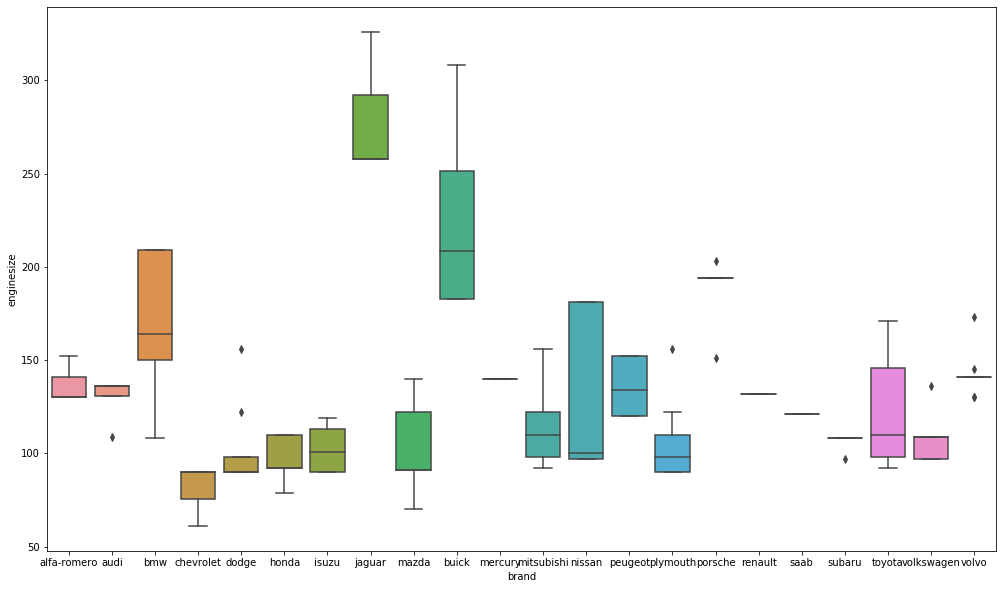

In [184]:
# Let's look at the relationship between "brand" and "enginesize"

plt.subplots(figsize = (17,10))
sns.boxplot(x="brand", y="enginesize", data=data)

# Checking p-value for all the numerical columns

In [185]:
from scipy import stats
import numpy as np
import statsmodels.api as sm

In [207]:
features_names = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
target_name = 'price'
X = data[features_names].values
Y = data[target_name].values

In [210]:
mod = sm.OLS(Y,X)
fit = mod.fit()
fit.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              315.2
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                   1.03e-123
Time:                        15:31:17   Log-Likelihood:                         -1942.4
No. Observations:                 205   AIC:                                      3913.
Df Residuals:                     191   BIC:                                      3959.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           104.6048    243.101      0.430      0.667    -374.903     584.113
x2           206.8136    109.521      1.888      0.060      -9.213     422.840
x3           -92.5613     56.915     -1.626      0.106    -204.824      19.701
x4           -97.9771    184.037     -0.532      0.595    -460.984     265.030
x5             8.3413    129.364      0.064      0.949    -246.825     263.507
x6             2.7799      1.758      1.582      0.115      -0.687       6.247
x7           116.0490     14.183      8.183      0.000      88.075     144.024
x8         -2194.8428   1165.994     -1.882      0.061   -4494.721     105.036
x9         -3524.1683    784.537     -4.492      0.000   -5071.638   -1976.698
x10          347.9189     83.395      4.172      0.000     183.425     512.412
x11           34.0957     16.672      2.045      0.042       1.211      66.981
x12            1.7075      0.657      2.599      0.010       0.412       3.004
x13         -355.9721    183.196     -1.943      0.053    -717.319       5.375
x14          162.3257    163.738      0.991      0.323    -160.642     485.294
==============================================================================
Omnibus:                       22.227   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.485
Skew:                           0.237   Prob(JB):                     4.51e-19
Kurtosis:                       6.109   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#p-value for 'enginesize'(x7),'stroke'(x9),'compressionratio'(x10),'peakrpm'(x12),'horsepower'(x11) is less than 0.05
#so we can considered that these columns are more significant

In [108]:
#We also have strong correlation between engine size and Brand so we can take engine size as feature for single linear regression.

# Making Simple Linear Regression taking Engine size as the best variable

In [109]:
#from sklearn.model_selection import train_test_split # it helps to split model in desied prercentage
#from sklearn.linear_model import LinearRegression

In [213]:
f = 'enginesize'
t = 'price'

X1 = data[f].values.reshape(-1,1)
Y1 = data[t].values.reshape(-1,1)

In [214]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=0) # taking test size as 20%

In [215]:
len(x_train1), len(y_train1), len(x_test1), len(y_test1) #checking length of data in train and test

(164, 164, 41, 41)

In [216]:
LinearRegressionModelObject = LinearRegression()

In [217]:
LinearRegressionModelObject.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
LinearRegressionModelObject.intercept_

array([-7613.37093949])

In [222]:
y_predicted1 = LinearRegressionModelObject.predict(x_test1)

# Checking R square and RMSE value of model

In [221]:
#from sklearn.metrics import mean_squared_error 
#from sklearn.metrics import r2_score
#import math

In [223]:
rmse = math.sqrt(mean_squared_error(y_test1, y_predicted1))
r2 = r2_score(y_test1, y_predicted1)*100

In [224]:
print("The RMSE for the model is {} and r2 is {}%".format(round(rmse,2),round(r2,2)))

The RMSE for the model is 4103.11 and r2 is 78.25%


# Building multiple linear regression model using variables with p-value less than 0.05 (i.e, engine size - stroke - compression ratio - peak rpm - horsepower)

In [ ]:
#We dont take horsepower as horsepower and engine size are highly correlated 
#We prefer engine size over horsepower to build model as engine size is highly correlated with Brand also

In [225]:
f1 = ['enginesize','stroke','compressionratio','peakrpm']
t1 = 'price'

X2 = data[f1].values
Y2 = data[t1].values

In [226]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=0) #taking test size as 20%

In [227]:
len(x_train2), len(y_train2), len(x_test2), len(y_test2) #checking length of test and train data

(164, 164, 41, 41)

In [228]:
LinearRegressionModelObject1 = LinearRegression()

In [229]:
LinearRegressionModelObject1.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
y_predicted2 = LinearRegressionModelObject1.predict(x_test2)

# Calculating R2 and RMSE for multiple regression model

In [233]:
r22 = r2_score(y_test2, y_predicted2)*100
rmse2 = math.sqrt(mean_squared_error(y_test2, y_predicted2))

In [234]:
print("The RMSE for the model is {} and r2 is {}%".format(round(rmse2,2),round(r22,2)))

The RMSE for the model is 3560.12 and r2 is 83.63%


In [151]:
#We can observe that the R2 score is increased so we consider this as final model with accuracy of 83.63%

# The main Factors that drive price are-
1. Engine size and Horse Power
2. Stroke
3. Compression Ratio
4. Peak rpm
5. BRAND